In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
df=pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [8]:
df.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region']

In [12]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['Frequency']= df['Frequency'].astype('category')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df['Month'] =  df['Date'].dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df['Month_name'] =  df['Month'].apply(lambda x: calendar.month_abbr[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df['Region'] = df['Region'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Month,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [17]:
df_stats=df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

round(df_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate,740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57


In [18]:
regionwise_stats=df.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']]

round(regionwise_stats.describe().T,2)

Region                                           Rural        Urban
Estimated Unemployment Rate         count       359.00       381.00
                                    mean         10.32        13.17
                                    std          10.04        11.17
                                    min           0.00         0.00
                                    25%           3.79         5.82
                                    50%           6.76         9.97
                                    75%          13.76        18.04
                                    max          74.51        76.74
Estimated Employed                  count       359.00       381.00
                                    mean   10192852.57   4388625.58
                                    std     9847886.12   4411701.68
                                    min       49420.00     64538.00
                                    25%     2022981.00    778590.00
                                    50%     7508747.00   2821456.00
                                    75%    14752574.00   5756475.00
                                    max    45777509.00  17486683.00
Estimated Labour Participation Rate count       359.00       381.00
                                    mean         44.46        40.90
                                    std           8.85         6.92
                                    min          13.33        20.51
                                    25%          39.05        37.42
                                    50%          42.56        40.21
                                    75%          48.15        44.18
                                    max          72.57        72.26

In [19]:
statewise_stats=df.groupby(['States'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

statewise_stats=round(statewise_stats,2)

statewise_stats.sort_values(by='Estimated Unemployment Rate', ascending=False)

,States,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
24,Tripura,28.35,717002.64,61.82
8,Haryana,26.28,3557072.46,42.74
11,Jharkhand,20.58,4469240.43,41.67
2,Bihar,18.92,12366189.14,38.15
9,Himachal Pradesh,18.54,1059823.71,44.22
5,Delhi,16.50,2627512.86,38.93
10,Jammu & Kashmir,16.19,1799931.67,41.03
3,Chandigarh,15.99,316831.25,39.34
20,Rajasthan,14.06,10041064.75,39.97
25,Uttar Pradesh,12.55,28094832.18,39.43


In [20]:
statewise_stats.sort_values(by='Estimated Employed', ascending=False)

,States,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
25,Uttar Pradesh,12.55,28094832.18,39.43
15,Maharashtra,7.56,19990195.86,42.30
27,West Bengal,8.12,17198538.00,45.42
2,Bihar,18.92,12366189.14,38.15
22,Tamil Nadu,9.28,12269546.75,40.87
7,Gujarat,6.66,11402012.79,46.10
14,Madhya Pradesh,7.41,11115484.32,38.82
12,Karnataka,6.68,10667119.29,41.35
20,Rajasthan,14.06,10041064.75,39.97
0,Andhra Pradesh,7.48,8154093.18,39.38


In [21]:
statewise_stats.sort_values(by='Estimated Labour Participation Rate', ascending=False)

,States,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
24,Tripura,28.35,717002.64,61.82
16,Meghalaya,4.80,689736.81,57.08
23,Telangana,7.74,7939662.75,53.00
7,Gujarat,6.66,11402012.79,46.10
21,Sikkim,7.25,106880.71,46.07
27,West Bengal,8.12,17198538.00,45.42
1,Assam,6.43,5354772.15,44.87
9,Himachal Pradesh,18.54,1059823.71,44.22
4,Chhattisgarh,9.24,4303498.57,42.81
8,Haryana,26.28,3557072.46,42.74


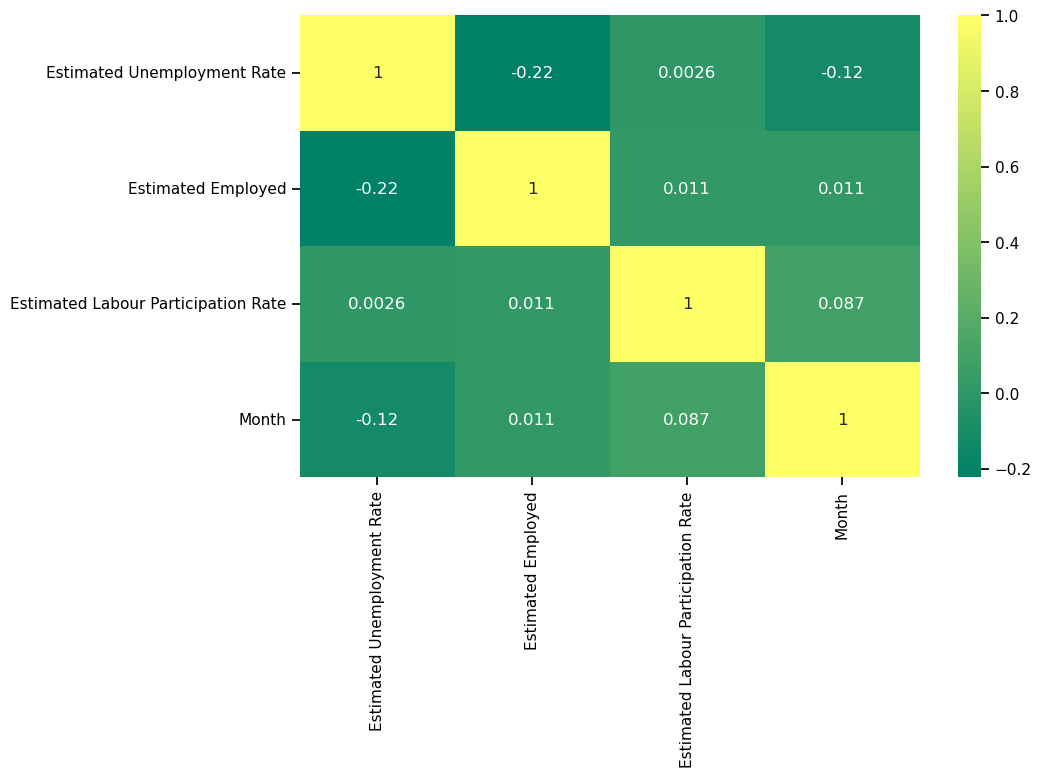

In [27]:
heat_maps = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate','Month']]
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1)
sns.heatmap(heat_maps, annot=True, cmap='summer');

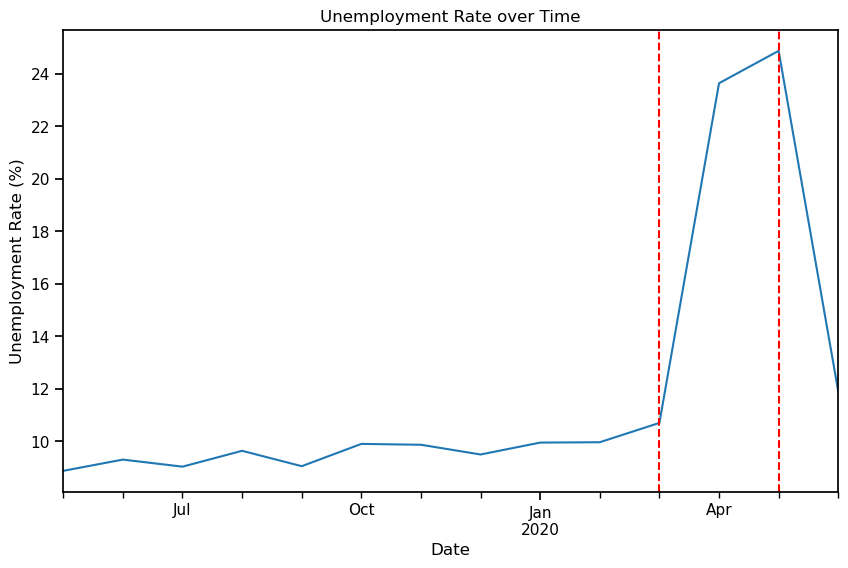

In [41]:
# Define the start date of the lockdown period
lockdown_start = pd.to_datetime('2020-03-01')
lockdown_end = pd.to_datetime('2020-05-31')

# Create a new column to indicate whether the date is before or after the lockdown
df['Lockdown'] = df['Date'] >= lockdown_start

# Group the dataframe by date and calculate the mean unemployment rate for each date
unemployment_by_date = df.groupby('Date')['Estimated Unemployment Rate'].mean()

# Create the line plot with a vertical line at the lockdown start date
fig, ax = plt.subplots(figsize=(10, 6))
unemployment_by_date.plot(ax=ax)
ax.axvline(lockdown_start, color='red', linestyle='--')
ax.axvline(lockdown_end, color='red', linestyle='--')
ax.set(title='Unemployment Rate over Time', xlabel='Date', ylabel='Unemployment Rate (%)')
plt.show()

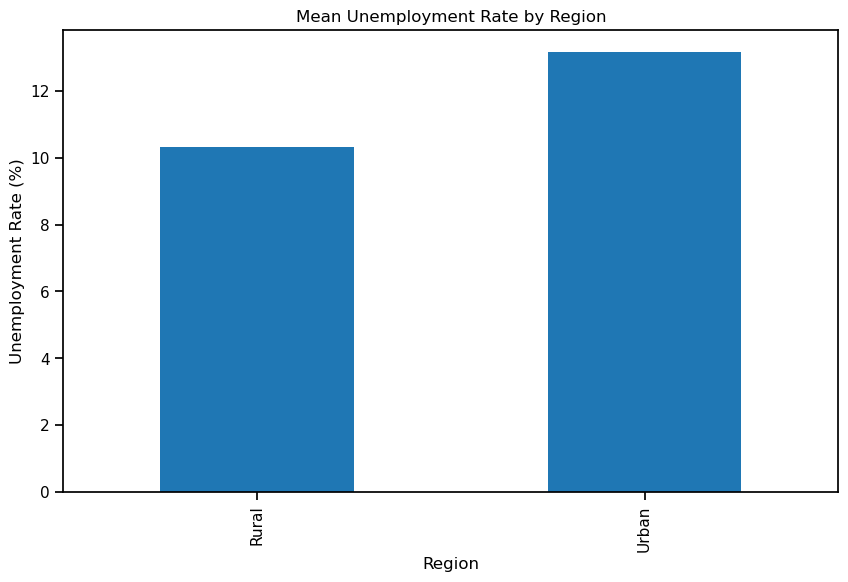

In [30]:
# Group the dataframe by region and calculate the mean unemployment rate for each region
unemployment_by_region = df.groupby('Region')['Estimated Unemployment Rate'].mean()

# Create a bar chart of the mean unemployment rate for each region
fig, ax = plt.subplots(figsize=(10, 6))
unemployment_by_region.plot(kind='bar', ax=ax)
ax.set(title='Mean Unemployment Rate by Region', xlabel='Region', ylabel='Unemployment Rate (%)')
plt.show()

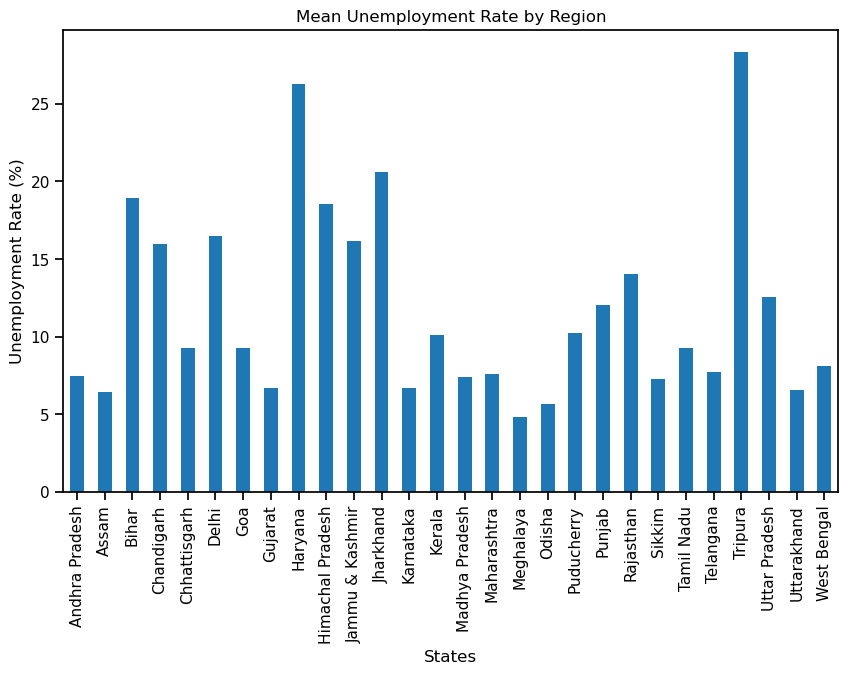

In [32]:
# Group the dataframe by region and calculate the mean unemployment rate for each region
unemployment_by_region = df.groupby('States')['Estimated Unemployment Rate'].mean()

# Create a bar chart of the mean unemployment rate for each region
fig, ax = plt.subplots(figsize=(10, 6))
unemployment_by_region.plot(kind='bar', ax=ax)
ax.set(title='Mean Unemployment Rate by Region', xlabel='States', ylabel='Unemployment Rate (%)')
plt.show()

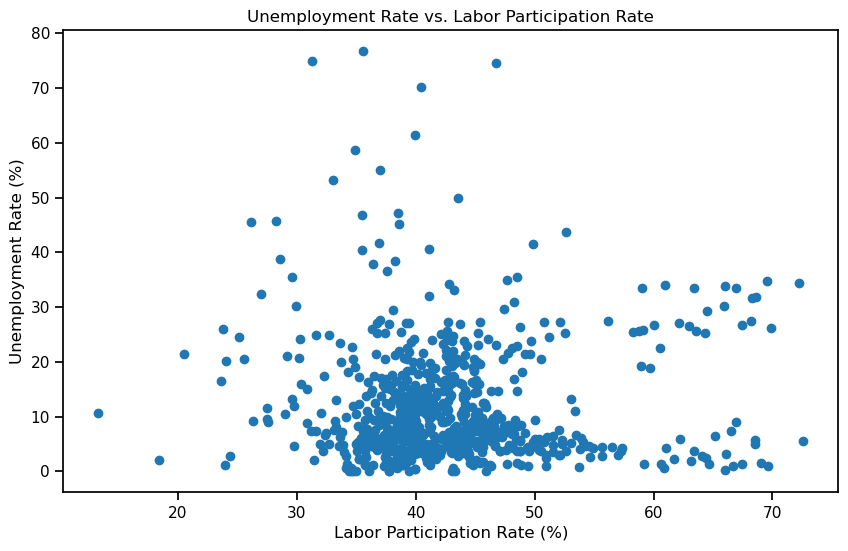

In [33]:
# Create a scatter plot of the relationship between the unemployment rate and the estimated labor participation rate
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Estimated Labour Participation Rate'], df['Estimated Unemployment Rate'])
ax.set(title='Unemployment Rate vs. Labor Participation Rate', xlabel='Labor Participation Rate (%)', ylabel='Unemployment Rate (%)')
plt.show()

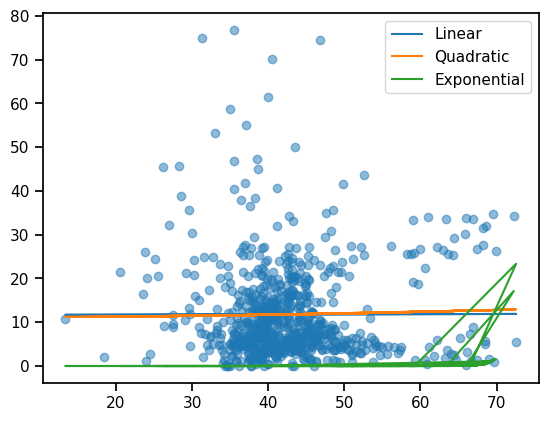

In [34]:
import statsmodels.api as sm
# X and Y are the two variables we want to analyze
X = df['Estimated Labour Participation Rate']
Y = df['Estimated Unemployment Rate']

# Fit a linear regression model to the data
model_linear = sm.OLS(Y, sm.add_constant(X)).fit()

# Fit a quadratic regression model to the data
model_quadratic = sm.OLS(Y, sm.add_constant(X**2)).fit()

# Fit an exponential regression model to the data
model_exponential = sm.OLS(Y, sm.add_constant(np.exp(X))).fit()

# Plot the scatter plot with regression lines
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, model_linear.predict(sm.add_constant(X)), label='Linear')
plt.plot(X, model_quadratic.predict(sm.add_constant(X**2)), label='Quadratic')
plt.plot(X, model_exponential.predict(sm.add_constant(np.exp(X))), label='Exponential')
plt.legend()
plt.show()

In [36]:
lockdown = df[(df['Month'] >= 4) & (df['Month'] <=7)]

bf_lock = df[(df['Month'] >= 1) & (df['Month'] <=4)]

In [38]:
gr_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

gr_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()


gr_lock['Unemployment Rate before lockdown'] = gr_bf_lock['Estimated Unemployment Rate']

gr_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

gr_lock.head(3)

,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,10.054167,10.75625
1,Assam,6.049091,6.75000
2,Bihar,25.370000,23.69000


In [39]:
# percentage change in unemployment rate
gr_lock['percentage change in unemployment'] = round(gr_lock['Unemployment Rate after lockdown'] - gr_lock['Unemployment Rate before lockdown']
                                                    /gr_lock['Unemployment Rate before lockdown'],2)
percent = gr_lock.sort_values('percentage change in unemployment')


In [42]:
# percentage change in unemployment after lockdown
import plotly.express as px
fig = px.bar(percent, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='percentage change in Unemployment in each state after lockdown',template='ggplot2')

fig.show()

# **Most Impacted States after Lockdown**
* Haryana
* Jharkhand
* Tripura
* Bihar
* Puducherry